# Captcha Solver
This captcha solver uses the HOG algorithm for describing letter characteristics, and then the method x for classification.

In [76]:
import os

import cv2

from skimage import data, exposure
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_local
from skimage.morphology import closing, square, remove_small_objects
from skimage.measure import label, regionprops
from skimage.feature import hog
import matplotlib.pyplot as plt
from skimage.transform import resize

IMG_PATH = 'CAPTCHA-10k/'

## 1. Dividing the captcha image into the 6 characters

In [82]:
# Read the original image and turn it into grayscale
img = cv2.imread(os.path.join(IMG_PATH, 'treinamento/000001.jpg')) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Display original image
plt.imshow(img)
plt.axis(False)
plt.show()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)


In [78]:
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img, (3,3), 0) 

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

canny = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection

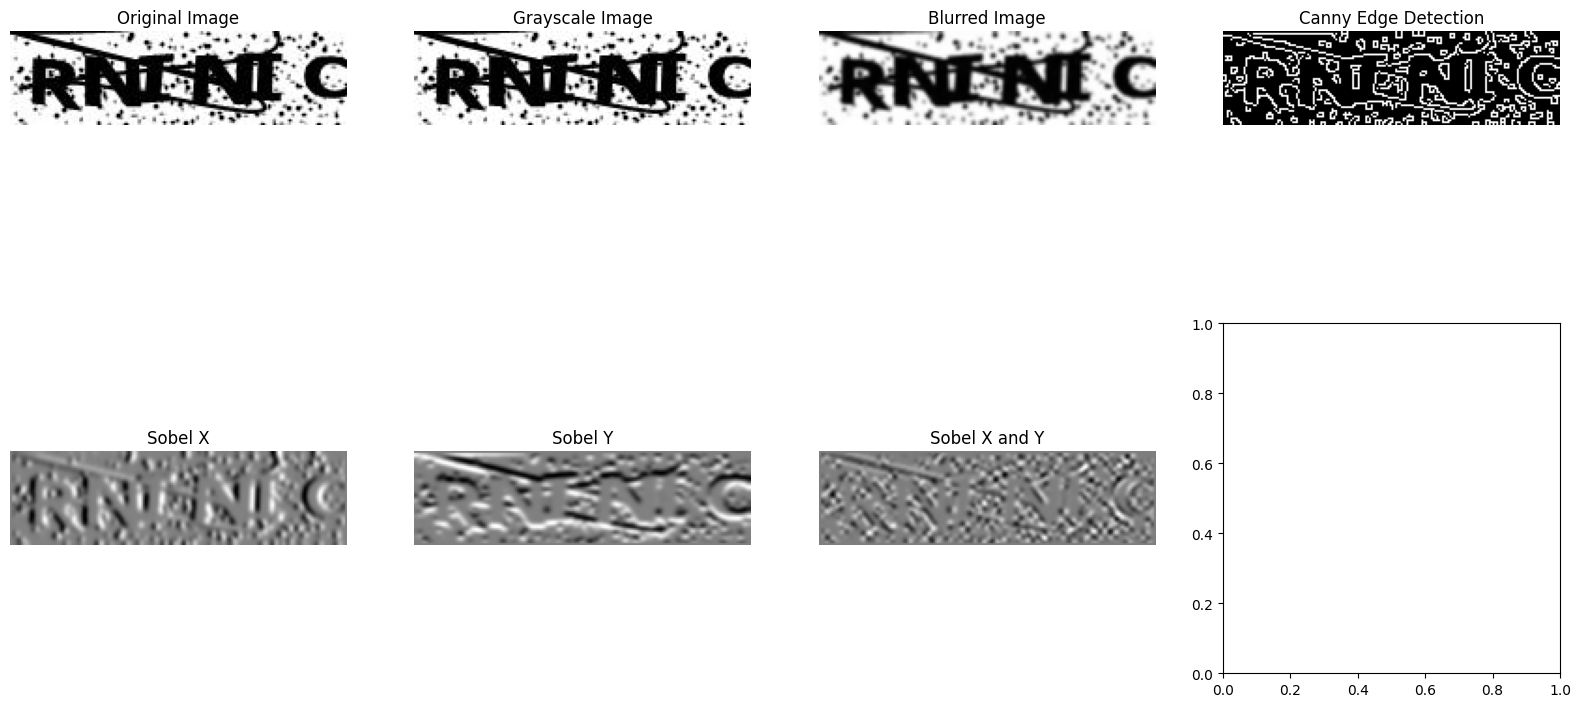

In [79]:
# Plot the images
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

axes[0, 0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(img_gray, cmap='gray')
axes[0, 1].set_title('Grayscale Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(img_blur, cmap='gray')
axes[0, 2].set_title('Blurred Image')
axes[0, 2].axis('off')

axes[0, 3].imshow(canny, cmap='gray')
axes[0, 3].set_title('Canny Edge Detection')
axes[0, 3].axis('off')

axes[1, 0].imshow(sobelx, cmap='gray')
axes[1, 0].set_title('Sobel X')
axes[1, 0].axis('off')

axes[1, 1].imshow(sobely, cmap='gray')
axes[1, 1].set_title('Sobel Y')
axes[1, 1].axis('off')

axes[1, 2].imshow(sobelxy, cmap='gray')
axes[1, 2].set_title('Sobel X and Y')
axes[1, 2].axis('off')

plt.show()

DIVIDIR OS CARACTERES

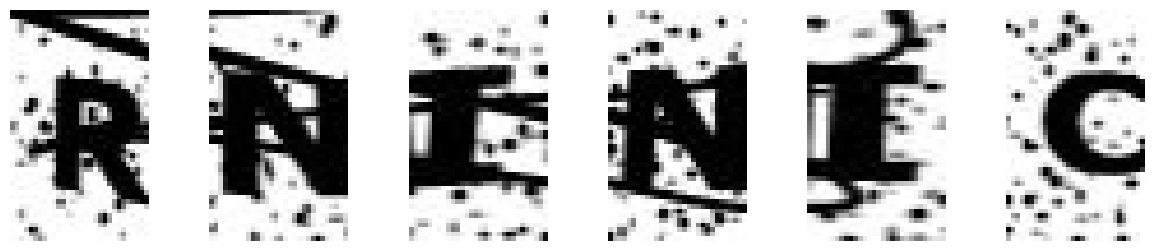

In [80]:
# Get the height and width of the image
height, width = img.shape[:2]

# Define the list of quadrant widths
quadrant_widths = [37, 32, 25, 35, 20, 50]  # Example widths

# Create a list to store the quadrants
quadrants = []

# Divide the image into vertical quadrants based on the given widths
start_col = 0
for w in quadrant_widths:
    end_col = start_col + w
    quadrant = img[:, start_col:end_col]
    quadrants.append(quadrant)
    start_col = end_col

# Resize each quadrant so they have the same width
quadrants = [resize(q, (height, width // 6)) for q in quadrants]
    
# Optionally, display the quadrants
fig, axes = plt.subplots(1, len(quadrants), figsize=(15, 3))
for ax, quadrant in zip(axes, quadrants):
    ax.imshow(quadrant, cmap='gray')
    ax.axis('off')
plt.show()

## 2. Extracting features using HOG

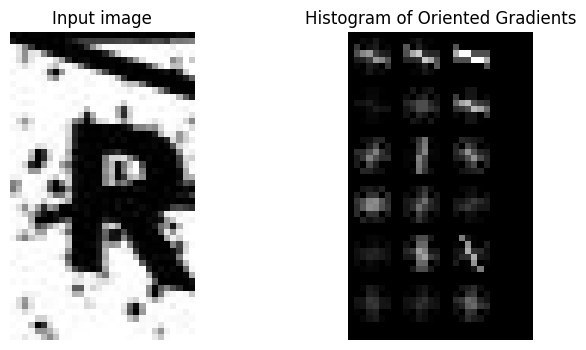

In [81]:
fd, hog_image = hog(
		quadrants[0],
		orientations=8,
		pixels_per_cell=(8, 8),
		cells_per_block=(1, 1),
		visualize=True,
	)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(quadrants[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()